In [1]:

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
%matplotlib notebook
import time

from graph_nets import blocks
from graph_nets import utils_tf
from graph_nets import utils_np
from graph_nets.demos import models
from matplotlib import pyplot as plt
from matplotlib import animation
import numpy as np
import pandas as pd
import networkx as nx
import sonnet as snt
import tensorflow as tf
import os
from Simulation_functions import SpringMassSimulator, generate_trajectory, roll_out_physics
#from Graph_creator_functions import rectangle_graph, measure_errors_deviation_from_rectangle


try:
    import seaborn as sns
except ImportError:
    pass
else:
    sns.reset_orig()

SEED = 1
np.random.seed(SEED)
tf.set_random_seed(SEED)

/home/vabence/anaconda3/envs/TensorEnv/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/home/vabence/anaconda3/envs/TensorEnv/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/vabence/anaconda3/envs/TensorEnv/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [30]:
BASE_PATH = "/home/vabence/git_workspace/Dyadic_Collaboration/Graph_Networks/Learning_Experiments/Results/RigidBody_one_way_not_fixed_box"

true_trajectory_not_fixed_np = np.load(os.path.join(BASE_PATH, "true_trajectory_4.npy"))
predicted_trajectory_not_fixed_np = np.load(os.path.join(BASE_PATH, "predicted_trajectory_4.npy"))

BASE_PATH = "/home/vabence/git_workspace/Dyadic_Collaboration/Graph_Networks/Learning_Experiments/Results/RigidBody_one_way_fixed_box"

true_trajectory_fixed_np = np.load(os.path.join(BASE_PATH, "true_trajectory_4.npy"))
predicted_trajectory_fixed_np = np.load(os.path.join(BASE_PATH, "predicted_trajectory_4.npy"))

BASE_PATH = "/home/vabence/git_workspace/Dyadic_Collaboration/Graph_Networks/Learning_Experiments/Results/RigidBody_two_way_fixed_box"

true_trajectory_fixed_two_np = np.load(os.path.join(BASE_PATH, "true_trajectory_4.npy"))
predicted_trajectory_fixed_two_np = np.load(os.path.join(BASE_PATH, "predicted_trajectory_4.npy"))

<IPython.core.display.Javascript object>


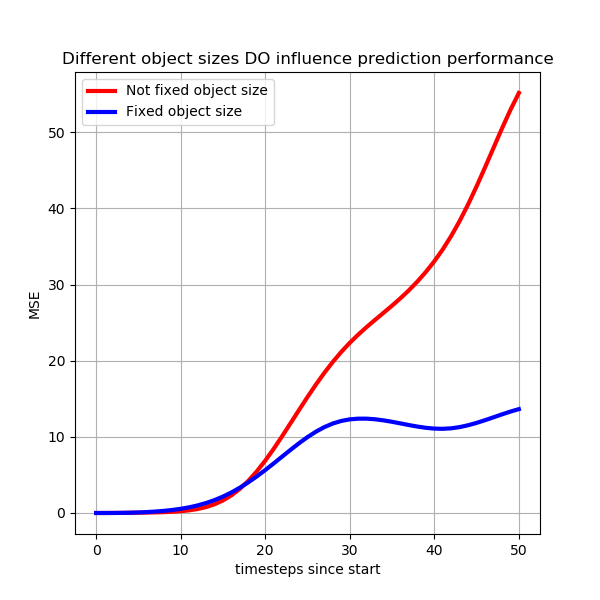

In [59]:
true_trajectory_not_fixed_np_pos = true_trajectory_not_fixed_np[:,:,:,:2]
true_trajectory_not_fixed_np_vel = true_trajectory_not_fixed_np[:,:,:,2:4]

predicted_trajectory_not_fixed_np_pos = predicted_trajectory_not_fixed_np[:,:,:,:2]
predicted_trajectory_not_fixed_np_vel = predicted_trajectory_not_fixed_np[:,:,:,2:4]

true_trajectory_fixed_np_pos = true_trajectory_fixed_np[:,:,:,:2]
true_trajectory_fixed_np_vel = true_trajectory_fixed_np[:,:,:,2:4]

predicted_trajectory_fixed_np_pos = predicted_trajectory_fixed_np[:,:,:,:2]
predicted_trajectory_fixed_np_vel = predicted_trajectory_fixed_np[:,:,:,2:4]




pos_not_fixed_MSE = np.mean(np.mean(np.sum(np.square(true_trajectory_not_fixed_np_pos - predicted_trajectory_not_fixed_np_pos),axis=3),axis=2),axis=0)
vel_not_fixed_MSE = np.mean(np.mean(np.sum(np.square(true_trajectory_not_fixed_np_vel - predicted_trajectory_not_fixed_np_vel),axis=3),axis=2),axis=0)

pos_fixed_MSE = np.mean(np.mean(np.sum(np.square(true_trajectory_fixed_np_pos - predicted_trajectory_fixed_np_pos),axis=3),axis=2),axis=0)
vel_fixed_MSE = np.mean(np.mean(np.sum(np.square(true_trajectory_fixed_np_vel - predicted_trajectory_fixed_np_vel),axis=3),axis=2),axis=0)


plt.close()

fig = plt.figure(1, figsize=(6, 6))
fig.clf()
x = np.array(range(0,51))


ax = fig.add_subplot(1, 1, 1)
ax.plot(x, pos_not_fixed_MSE, "r", label = "Not fixed object size",linewidth=3.0)
ax.plot(x, pos_fixed_MSE, "b", label = "Fixed object size",linewidth=3.0)
ax.legend()
ax.set_xlabel("timesteps since start")
ax.set_ylabel("MSE")
ax.grid(True)
ax.set_title("Different object sizes DO influence prediction performance")
"""
ax = fig.add_subplot(1, 2, 2)
ax.plot(x, vel_not_fixed_MSE, "b")
ax.plot(x, vel_fixed_MSE,"g")
ax.set_title("MSE : vel")
"""
plt.savefig("MSE_One_way")

<IPython.core.display.Javascript object>


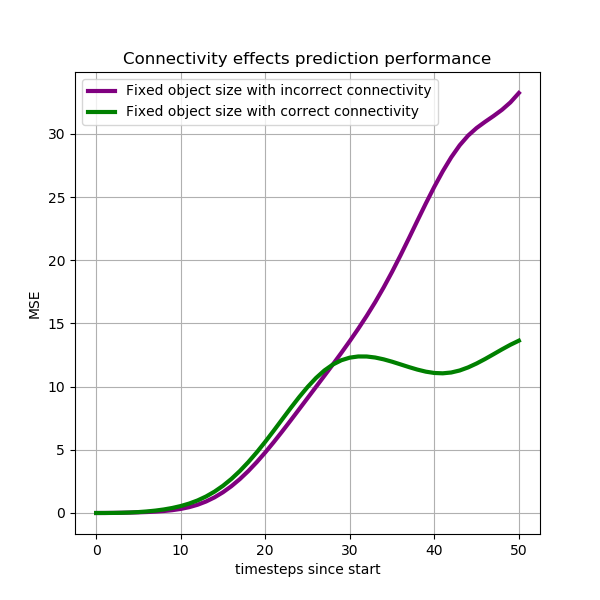

In [58]:
true_trajectory_fixed_np_pos = true_trajectory_fixed_np[:,:,:,:2]
true_trajectory_fixed_np_vel = true_trajectory_fixed_np[:,:,:,2:4]

predicted_trajectory_fixed_np_pos = predicted_trajectory_fixed_np[:,:,:,:2]
predicted_trajectory_fixed_np_vel = predicted_trajectory_fixed_np[:,:,:,2:4]

true_trajectory_fixed_two_np_pos = true_trajectory_fixed_two_np[:,:,:,:2]
true_trajectory_fixed_two_np_vel = true_trajectory_fixed_two_np[:,:,:,2:4]

predicted_trajectory_fixed_two_np_pos = predicted_trajectory_fixed_two_np[:,:,:,:2]
predicted_trajectory_fixed_two_np_vel = predicted_trajectory_fixed_two_np[:,:,:,2:4]





pos_fixed_two_MSE = np.mean(np.mean(np.sum(np.square(true_trajectory_fixed_two_np_pos - predicted_trajectory_fixed_two_np_pos),axis=3),axis=2),axis=0)
vel_fixed_two_MSE = np.mean(np.mean(np.sum(np.square(true_trajectory_fixed_two_np_vel - predicted_trajectory_fixed_two_np_vel),axis=3),axis=2),axis=0)

pos_fixed_MSE = np.mean(np.mean(np.sum(np.square(true_trajectory_fixed_np_pos - predicted_trajectory_fixed_np_pos),axis=3),axis=2),axis=0)
vel_fixed_MSE = np.mean(np.mean(np.sum(np.square(true_trajectory_fixed_np_vel - predicted_trajectory_fixed_np_vel),axis=3),axis=2),axis=0)


plt.close()

fig = plt.figure(1, figsize=(6, 6))
fig.clf()
x = np.array(range(0,51))


ax = fig.add_subplot(1, 1, 1)
ax.plot(x, pos_fixed_two_MSE, "purple", label = "Fixed object size with incorrect connectivity",linewidth=3.0)
ax.plot(x, pos_fixed_MSE, "g", label = "Fixed object size with correct connectivity",linewidth=3.0)
ax.legend()
ax.set_xlabel("timesteps since start")
ax.set_ylabel("MSE")
ax.grid(True)
ax.set_title("Connectivity effects prediction performance")
"""
ax = fig.add_subplot(1, 2, 2)
ax.plot(x, vel_fixed_two_MSE, "b")
ax.plot(x, vel_fixed_MSE,"g")
ax.set_title("MSE : vel")
"""
plt.savefig("MSE_fixed_one_two_way")